**Preamble**

This is a **group** assignment. Please indicate the names of all group members below. 
Each group is to comprise *four* to *five* members.

If the group obtains a solution through research (e.g., on the web), then the group is to acknowledge the source, but *write up the solution in their OWN WORDS*.

**Deadline**: *22 Oct 2021 (10pm)*

In [5]:
# Marks 
# DO NOT CHANGE THIS

parts    = ['(a.i)    ', '(a.ii)   ', '(a.iii)  ', '(b)      ']
score    = [0,0,0,0]
maxscore = [5,5,4,6]

numparts = len(parts)

for i in range(numparts):
    print("score for {}: {} out of {}".format(parts[i], score[i], maxscore[i]))
print()
print("total score        : {} out of {}".format(sum(score),sum(maxscore)))

score for (a.i)    : 0 out of 5
score for (a.ii)   : 0 out of 5
score for (a.iii)  : 0 out of 4
score for (b)      : 0 out of 6

total score        : 0 out of 20


# K Best Assignments + Frequency Analysis

Assignment (not refering to the assignment problem) objectives:

A. Using PuLP and other techniques, implement a routine to determine the $k$ best assignments for a given cost matrix.

B. Using the routine in A, we perform [frequency analysis](https://en.wikipedia.org/wiki/Frequency_analysis) to decrypt a ciphertext.

---
## Finding the K Best Assignments

**(a)** We are given a cost matrix and in this part, we will find $k$ assignments with the lowest costs.

**(a.i) (5 marks)** Implement a routine in PuLP that finds a assignment with the minimum cost and also, determine the corresponding reduced cost matrix.

**Notes**
- You may need to implement two linear programmes (one corresponding to the primal and the other corresponding to the dual) in PuLP.
- You need *not* implement the hungarian method.




In [6]:
import pulp as pulp

def min_cost_assignment(cost_matrix):
    
    m = len(cost_matrix)
    assignment = [None for i in range(m)]
    reduced_cost_matrix = [[None for j in range(m)] for i in range(m)]

    # Primal
    model_primal = pulp.LpProblem("a.i.primal", pulp.LpMinimize)
    variable_primal = {}
    cost_primal = {}
    index_primal = []

    for i in range(m):
        for j in range(m):
            variable_primal[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
            cost_primal[(i,j)] = cost_matrix[i][j]
            index_primal.append((i,j))  

    model_primal += pulp.lpSum(variable_primal[i] * cost_primal[i] for i in index_primal), "Primal Objective"

    for i in range(m):
        constraint_index1_primal = []
        constraint_index2_primal = []
        for j in range(m):
            constraint_index1_primal.append((i,j))
            constraint_index2_primal.append((j,i))
        model_primal += pulp.lpSum(variable_primal[i] for i in constraint_index1_primal) == 1, "constraint_u%s"%i  
        model_primal += pulp.lpSum(variable_primal[i] for i in constraint_index2_primal) == 1, "constraint_v%s"%i

    model_primal.solve()

    for i in range(m):
        for j in range(m):
            if variable_primal[(i,j)].varValue == 1:
                assignment[i] = j

    # Dual
    model_dual = pulp.LpProblem("a.i.dual", pulp.LpMaximize)
    variable_dual = {}
    index_dual = []

    for i in range(m):
        variable_dual['u'+str(i)] = pulp.LpVariable('u'+'_'+str(i))
        variable_dual['v'+str(i)] = pulp.LpVariable('v'+'_'+str(i))
        index_dual.append('u'+str(i))
        index_dual.append('v'+str(i))

    model_dual += pulp.lpSum(variable_dual[i] for i in index_dual), "Dual Objective" 

    for i in range(m):
        for j in range(m):
            model_dual += pulp.lpSum(variable_dual['u'+str(i)] + variable_dual['v'+str(j)]) <= cost_matrix[i][j], "constraint_%s_%s"%(i,j) 

    model_dual.solve()

    for i in range(m):
        for j in range(m):
            reduced_cost_matrix[i][j] = round(cost_matrix[i][j] - variable_dual['u'+str(i)].varValue - variable_dual['v'+str(j)].varValue,1)
    
    return assignment, reduced_cost_matrix

# DO NOT CHANGE THE CODE HERE IN YOUR SUBMISSION

cost_matrix = [
    [30, 20, 33, 47, 20, 21, 55, 13, 24, 31],
    [38, 36, 32, 33, 38, 15, 53, 29, 35, 56],
    [30, 25, 41, 17, 19, 37, 28, 21, 15, 43],
    [52, 52, 48, 30, 56, 35, 49, 38, 55, 33],
    [45, 58, 18, 21, 35, 49, 59, 27, 34, 18],
    [21, 56, 41, 35, 28, 18, 39, 40, 19, 54],
    [28, 13, 41, 27, 53, 32, 48, 19, 11, 24],
    [41, 17, 13, 24, 57, 56, 17, 39, 31, 37],
    [36, 13, 58, 49, 49, 20, 52, 23, 14, 35],
    [24, 43, 23, 22, 31, 33, 31, 54, 34, 21],
]

assignment, reduced_cost_matrix = min_cost_assignment(cost_matrix)

print("best assignment : {}".format(assignment))
print("here, this means that Machine 0 is assigned to Job {}".format(assignment[0]))

print("reduced cost matrix : ")

for row in reduced_cost_matrix:
    print(row)

best assignment : [7, 5, 4, 3, 2, 0, 8, 6, 1, 9]
here, this means that Machine 0 is assigned to Job 7
reduced cost matrix : 
[22.0, 15.0, 28.0, 41.0, 5.0, 16.0, 40.0, 0.0, 19.0, 26.0]
[20.0, 21.0, 17.0, 17.0, 13.0, 0.0, 28.0, 6.0, 20.0, 41.0]
[18.0, 16.0, 32.0, 7.0, 0.0, 28.0, 9.0, 4.0, 6.0, 34.0]
[20.0, 23.0, 19.0, 0.0, 17.0, 6.0, 10.0, 1.0, 26.0, 4.0]
[24.0, 40.0, -0.0, 2.0, 7.0, 31.0, 31.0, 1.0, 16.0, 0.0]
[0.0, 38.0, 23.0, 16.0, 0.0, 0.0, 11.0, 14.0, 1.0, 36.0]
[14.0, 2.0, 30.0, 15.0, 32.0, 21.0, 27.0, 0.0, 0.0, 13.0]
[31.0, 10.0, 6.0, 16.0, 40.0, 49.0, 0.0, 24.0, 24.0, 30.0]
[20.0, 0.0, 45.0, 35.0, 26.0, 7.0, 29.0, 2.0, 1.0, 22.0]
[0.0, 22.0, 2.0, 0.0, 0.0, 12.0, 0.0, 25.0, 13.0, 0.0]


**(a.ii) (5 marks)** You are given a *cost matrix* with a corresponding *minimum cost assignment* and a corresponding *reduced cost matrix*. Your task is to find a second best assignment.

**Notes**
- Using a `for` loop, you may need to implement $m$ linear programmes in PuLP. Here, $m$ is the number of rows in the the reduced cost matrix.
- You need *not* implement Dijkstra's algorithm to find the shortest path.

In [7]:
import pulp as pulp

def next_best_assignment(cost_matrix, assignment):
    
    m = len(cost_matrix)
    assignment_dict = {}
    
    for machine, job in enumerate(assignment):
        model_primal = pulp.LpProblem("a.i.primal", pulp.LpMinimize)
        variable_primal = {}
        cost_primal = {}
        index_primal = []

        for i in range(m):
            for j in range(m):
                variable_primal[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
                cost_primal[(i,j)] = cost_matrix[i][j]
                index_primal.append((i,j))  

        model_primal += pulp.lpSum(variable_primal[i] * cost_primal[i] for i in index_primal), "Primal Objective"

        for i in range(m):
            constraint_index1_primal = []
            constraint_index2_primal = []
            for j in range(m):
                constraint_index1_primal.append((i,j))
                constraint_index2_primal.append((j,i))
            model_primal += pulp.lpSum(variable_primal[i] for i in constraint_index1_primal) == 1, "constraint_u%s"%i  
            model_primal += pulp.lpSum(variable_primal[i] for i in constraint_index2_primal) == 1, "constraint_v%s"%i

        model_primal += variable_primal[(machine,job)] == 0, "constraint from the best assignment"
        model_primal.solve()
        assignment = []

        for i in range(m):
            for j in range(m):
                if variable_primal[(i,j)].varValue == 1:
                    assignment.append(j)

        assignment_dict[pulp.value(model_primal.objective)] = assignment
    
    next_assignment = assignment_dict[min(assignment_dict.keys())]
    
    return next_assignment

# DO NOT CHANGE THE CODE HERE IN YOUR SUBMISSION

cost_matrix = [
    [30, 20, 33, 47, 20, 21, 55, 13, 24, 31],
    [38, 36, 32, 33, 38, 15, 53, 29, 35, 56],
    [30, 25, 41, 17, 19, 37, 28, 21, 15, 43],
    [52, 52, 48, 30, 56, 35, 49, 38, 55, 33],
    [45, 58, 18, 21, 35, 49, 59, 27, 34, 18],
    [21, 56, 41, 35, 28, 18, 39, 40, 19, 54],
    [28, 13, 41, 27, 53, 32, 48, 19, 11, 24],
    [41, 17, 13, 24, 57, 56, 17, 39, 31, 37],
    [36, 13, 58, 49, 49, 20, 52, 23, 14, 35],
    [24, 43, 23, 22, 31, 33, 31, 54, 34, 21],
]

assignment = [7, 5, 4, 3, 2, 0, 8, 6, 1, 9]

reduced_cost_matrix =[
    [22, 15, 28, 41, 5, 16, 40, 0, 19, 26],
    [20, 21, 17, 17, 13, 0, 28, 6, 20, 41],
    [18, 16, 32, 7, 0, 28, 9, 4, 6, 34],
    [20, 23, 19, 0, 17, 6, 10, 1, 26, 4],
    [24, 40, 0, 2, 7, 31, 31, 1, 16, 0],
    [0, 38, 23, 16, 0, 0, 11, 14, 1, 36],
    [14, 2, 30, 15, 32, 21, 27, 0, 0, 13],
    [31, 10, 6, 16, 40, 49, 0, 24, 24, 30],
    [20, 0, 45, 35, 26, 7, 29, 2, 1, 22],
    [0, 22, 2, 0, 0, 12, 0, 25, 13, 0],
]

next_assignment = next_best_assignment(cost_matrix, assignment)

print("next best assignment : {}".format(next_assignment))
m = len(assignment)
for i in range(m):
    print("here, this means that Machine {} is assigned to Job {}".format(i, next_assignment[i]))


next best assignment : [7, 5, 4, 3, 9, 0, 8, 6, 1, 2]
here, this means that Machine 0 is assigned to Job 7
here, this means that Machine 1 is assigned to Job 5
here, this means that Machine 2 is assigned to Job 4
here, this means that Machine 3 is assigned to Job 3
here, this means that Machine 4 is assigned to Job 9
here, this means that Machine 5 is assigned to Job 0
here, this means that Machine 6 is assigned to Job 8
here, this means that Machine 7 is assigned to Job 6
here, this means that Machine 8 is assigned to Job 1
here, this means that Machine 9 is assigned to Job 2


**(a.iii) (4 marks)** You are given a cost matrix. Using the routines in (a.i) and (a.ii), your task is to produce *four* assignments with the lowest costs.

**Notes**
- Evaluating all assignments / permutations /  will yield **zero** credit.
- To demonstrate your solution, you only need to *display branching tree*. You need to show the following information.
    - The labels of the branches.
    - The best and next-best assignments at each node.
- You need *not* automate the branching process and need **not** use `pyplot` to display the tree.
- To force $x_{ij}$ to be zero, it may be convenient to modify the entry $c_{ij}$ in the cost matrix to be large. You need not adopt this suggestion.
- Side information: *The lowest five costs are distinct*. This side information is to help you check your solution. It is **not true** that the lowest costs are always distinct.

In [8]:
def make_1st_2nd_best_assignment(cost_matrix,constraint_list={}):
    
    m = len(cost_matrix)
    assignment = [None for i in range(m)]

    # best assignment
    model_primal = pulp.LpProblem("best assignment", pulp.LpMinimize)
    variable_primal = {}
    cost_primal = {}
    index_primal = []

    for i in range(m):
        for j in range(m):
            variable_primal[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
            cost_primal[(i,j)] = cost_matrix[i][j]
            index_primal.append((i,j))  

    model_primal += pulp.lpSum(variable_primal[i] * cost_primal[i] for i in index_primal), "Primal Objective"

    for i in range(m):
        constraint_index1_primal = []
        constraint_index2_primal = []
        for j in range(m):
            constraint_index1_primal.append((i,j))
            constraint_index2_primal.append((j,i))
        model_primal += pulp.lpSum(variable_primal[i] for i in constraint_index1_primal) == 1, "constraint_u%s"%i  
        model_primal += pulp.lpSum(variable_primal[i] for i in constraint_index2_primal) == 1, "constraint_v%s"%i
    if len(constraint_list) != 0:
        for i in constraint_list.keys():
            model_primal += variable_primal[i] == constraint_list[i]
                
    model_primal.solve()

    for i in range(m):
        for j in range(m):
            if variable_primal[(i,j)].varValue == 1:
                assignment[i] = j
                
    # next best assignment
    assignment_dict = {}
    for machine, job in enumerate(assignment):
        if (machine,job) in constraint_list.keys():
            continue
        
        model_primal_next = pulp.LpProblem("next best assignment", pulp.LpMinimize)
        variable_primal_next = {}
        cost_primal_next = {}
        index_primal_next = []

        for i in range(m):
            for j in range(m):
                variable_primal_next[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
                cost_primal_next[(i,j)] = cost_matrix[i][j]
                index_primal_next.append((i,j))  

        model_primal_next += pulp.lpSum(variable_primal_next[i] * cost_primal_next[i] for i in index_primal_next), "Primal Objective"

        for i in range(m):
            constraint_index1_primal_next = []
            constraint_index2_primal_next = []
            for j in range(m):
                constraint_index1_primal_next.append((i,j))
                constraint_index2_primal_next.append((j,i))
            model_primal_next += pulp.lpSum(variable_primal_next[i] for i in constraint_index1_primal_next) == 1, "constraint_u%s"%i  
            model_primal_next += pulp.lpSum(variable_primal_next[i] for i in constraint_index2_primal_next) == 1, "constraint_v%s"%i
            
        model_primal_next += variable_primal_next[(machine,job)] == 0, "constraint from the best assignment"

        if len(constraint_list) != 0:
            for i in constraint_list.keys():
                model_primal_next += variable_primal_next[i] == constraint_list[i]            
        
        model_primal_next.solve()
        assignment_next = []

        for i in range(m):
            for j in range(m):
                if variable_primal_next[(i,j)].varValue == 1:
                    assignment_next.append(j)

        assignment_dict[pulp.value(model_primal_next.objective)] = assignment_next

    next_assignment = assignment_dict[min(assignment_dict.keys())]
                                      
    return assignment, next_assignment

In [9]:
import pulp as pulp
def tree(cost_matrix,tree_height,contraint_list):
    m = len(cost_matrix)
    node_objective = {}
    node_assignment = {}

    for i in range(tree_height):   
        k = 2**i
        sub = []
        for j in range(k):
            best_assignment, second_best_assignment = make_1st_2nd_best_assignment(cost_matrix,contraint_list[i][j])
            
            for l in range(m):
                branch_1 = copy.deepcopy(contraint_list[i][j])
                branch_0 = copy.deepcopy(contraint_list[i][j])
                if i == tree_height-1:
                    break
                elif best_assignment[l] != second_best_assignment[l]:
                    branch_1[(l,best_assignment[l])] = 1
                    branch_0[(l,best_assignment[l])] = 0
                    sub.append(branch_1)
                    sub.append(branch_0)
                    break

            node_objective['node'+'_'+str(j+k)+'_best assignment'] = sum(cost_matrix[machine][job] for machine, job in enumerate(best_assignment))
            node_assignment['node'+'_'+str(j+k)+'_best assignment'] = best_assignment

            if len(second_best_assignment) != len(cost_matrix):
                node_objective['node'+'_'+str(j+k)+'_2nd best assignment'] = "None"
                node_assignment['node'+'_'+str(j+k)+'_2nd best assignment'] = "None"
            else:
                node_objective['node'+'_'+str(j+k)+'_2nd best assignment'] = sum(cost_matrix[machine][job] for machine, job in enumerate(second_best_assignment))
                node_assignment['node'+'_'+str(j+k)+'_2nd best assignment'] = second_best_assignment

        if len(sub) != 0:
            contraint_list.append(sub)
            
    return node_objective,node_assignment

In [10]:
import copy
import pulp as pulp

cost_matrix = [
    [30, 20, 33, 47, 20, 21, 55, 13, 24, 31],
    [38, 36, 32, 33, 38, 15, 53, 29, 35, 56],
    [30, 25, 41, 17, 19, 37, 28, 21, 15, 43],
    [52, 52, 48, 30, 56, 35, 49, 38, 55, 33],
    [45, 58, 18, 21, 35, 49, 59, 27, 34, 18],
    [21, 56, 41, 35, 28, 18, 39, 40, 19, 54],
    [28, 13, 41, 27, 53, 32, 48, 19, 11, 24],
    [41, 17, 13, 24, 57, 56, 17, 39, 31, 37],
    [36, 13, 58, 49, 49, 20, 52, 23, 14, 35],
    [24, 43, 23, 22, 31, 33, 31, 54, 34, 21],
]

contraint_list = [[{}]]
tree_height = 3
node_objective, node_assignment = tree(cost_matrix,tree_height,contraint_list)
       

# Since the lowest five costs are distinct:
order = []
sort_orders = sorted(node_objective.items(), key=lambda x: x[1])
order_objective = sort_orders[0][1]
order.append(sort_orders[0][0])
for value in range(len(sort_orders)):
    if order_objective < sort_orders[value][1]:
        order_objective = sort_orders[value][1]
        order.append(sort_orders[value][0])

print('Assignment with lowest cost:',node_objective[order[0]],node_assignment[order[0]])
print('Assignment with second lowest cost:',node_objective[order[1]],node_assignment[order[1]])
print('Assignment with third lowest cost:',node_objective[order[2]],node_assignment[order[2]])
print('Assignment with fourth lowest cost:',node_objective[order[3]],node_assignment[order[3]])

Assignment with lowest cost: 178 [7, 5, 4, 3, 2, 0, 8, 6, 1, 9]
Assignment with second lowest cost: 180 [7, 5, 4, 3, 9, 0, 8, 6, 1, 2]
Assignment with third lowest cost: 181 [7, 5, 4, 3, 2, 0, 1, 6, 8, 9]
Assignment with fourth lowest cost: 182 [7, 5, 4, 9, 2, 0, 8, 6, 1, 3]


In [11]:
for index in range(len(node_objective)):
    print(list(node_objective.keys())[index])
    print('objective value:',list(node_objective.values())[index])
    print('assignment:',list(node_assignment.values())[index])

node_1_best assignment
objective value: 178
assignment: [7, 5, 4, 3, 2, 0, 8, 6, 1, 9]
node_1_2nd best assignment
objective value: 180
assignment: [7, 5, 4, 3, 9, 0, 8, 6, 1, 2]
node_2_best assignment
objective value: 178
assignment: [7, 5, 4, 3, 2, 0, 8, 6, 1, 9]
node_2_2nd best assignment
objective value: 181
assignment: [7, 5, 4, 3, 2, 0, 1, 6, 8, 9]
node_3_best assignment
objective value: 180
assignment: [7, 5, 4, 3, 9, 0, 8, 6, 1, 2]
node_3_2nd best assignment
objective value: 183
assignment: [7, 5, 4, 3, 9, 0, 1, 6, 8, 2]
node_4_best assignment
objective value: 178
assignment: [7, 5, 4, 3, 2, 0, 8, 6, 1, 9]
node_4_2nd best assignment
objective value: 182
assignment: [7, 5, 4, 9, 2, 0, 8, 6, 1, 3]
node_5_best assignment
objective value: 181
assignment: [7, 5, 4, 3, 2, 0, 1, 6, 8, 9]
node_5_2nd best assignment
objective value: 185
assignment: [7, 5, 4, 9, 2, 0, 1, 6, 8, 3]
node_6_best assignment
objective value: 180
assignment: [7, 5, 4, 3, 9, 0, 8, 6, 1, 2]
node_6_2nd best assignm

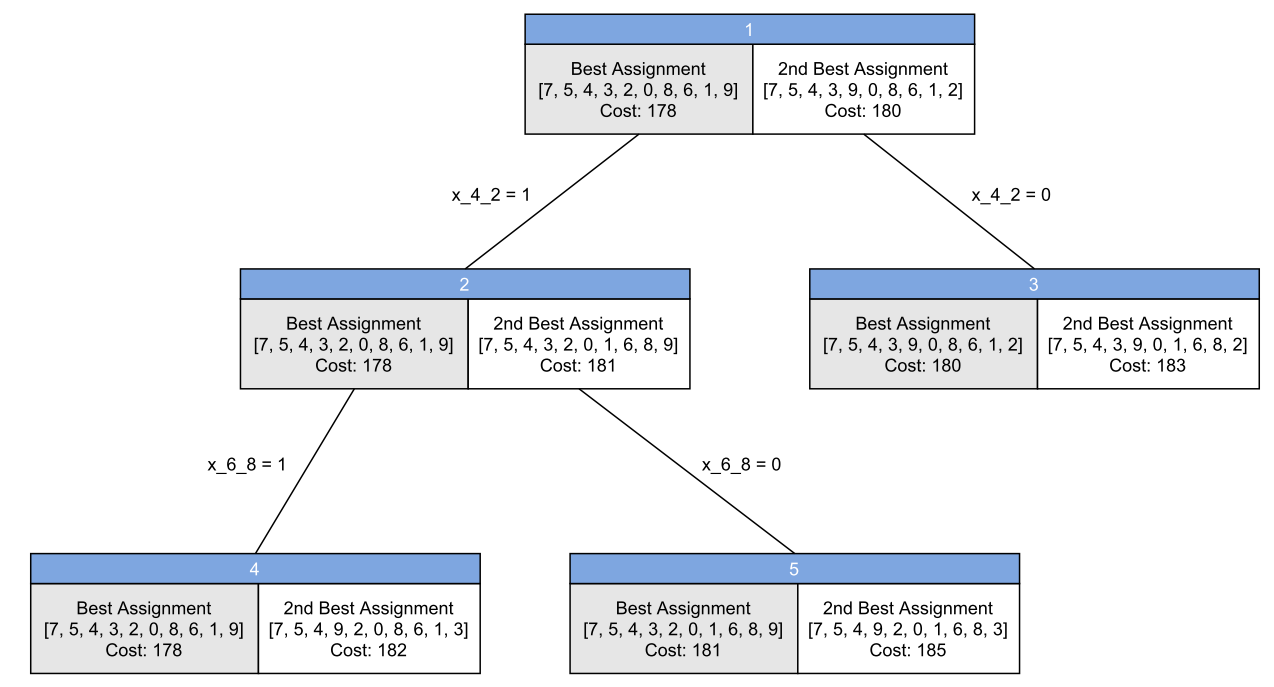

---
## Frequency Analysis

**(b) (6 marks)** Using frequency analysis, crack a substitution cipher by finding the plaintext that corresponds **one** of the two given ciphertexts. Specifically, after fixing certain letters, use techniques in part (a) to find the assignment with $k$th lowest cost (where $k$ is to be determined) and use the corresponding key to decrypt the ciphertext.


**Notes**:
- *Grading criteria*. If you successfully decrypt `ciphertext1`, your score is **2 out of 6**. If you successfully decrypt `ciphertext2`, your score is **6 out of 6**.
- For `ciphertext1`, I am providing a partial key. In other words, I am providing the encryption of sixteen letters. For `ciphertext2`, no letters are given. In other words, you need to figure out the encryption of all twentysix letters.
- In your solution, you need to provide:
    - the letters that you are fixing;
    - the $k$ assignments with the lowest costs (given the letters you fix);
    - the costs for each assignment;
    - the plaintext.
- The following cell provides a number of routines that help you decrypt the ciphertext.


In [12]:
from ciphertext import * 

#ciphertext = ciphertext1 #COMMENT IF NECESSARY
#partialkey = partialkey1 #COMMENT IF NECESSARY

ciphertext = ciphertext2 #COMMENT IF NECESSARY
partialkey = partialkey2 #COMMENT IF NECESSARY

# THIS IS EXAMPLE FROM CLASS
#ciphertext = ciphertext3 #COMMENT IF NECESSARY
#partialkey = partialkey3 #COMMENT IF NECESSARY

print("ciphertext  :", ciphertext)
print()
print("partial key :", partialkey)
print()

# This routine generates the cost matrix
cost_matrix = generate_cost_matrix(ciphertext)
print("***NOTE: The cost matrix is DIFFERENT from one described in lecture.***")
print("cost matrix :")
for row in cost_matrix: print(row)
print("***NOTE: The cost matrix is DIFFERENT from one described in lecture.***")
print()

# This routine generates a key based from an assignment

assignment = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# COMMENT IF NECESSARY
# THIS IS EXAMPLE FROM CLASS
#assignment = [16, 25, 10, 21, 20, 2, 4, 22, 17, 15, 24, 19, 18, 5, 13, 3, 1, 23, 14, 9, 11, 0, 6, 8, 7, 12]


keyguess = key_guess(assignment)
print("key guess :", keyguess)
print()

# This routine decrypts using some key
plaintext = decrypt(ciphertext, keyguess)
print("plaintext :", plaintext)


ciphertext  : DKBS JTJUP KTS TWLTZS HUUF XFU XI NZ ITVXPBDU EKBWQPUF, EXNHBFBFC TS BD QXUS UWUNUFDS XI DKU QGTWBDZ XI WBFUTP JPXCPTNNBFC TFQ EXNHBFTDXPBTW DXXWS IPXN CPTJK DKUXPZ. BD NTZ HU XI SXNU BFDUPUSD DX DUWW DKU SDXPZ XI BDS XPBCBF. B SJUFD DKU SGNNUP XI 1953 TD DKU BFSDBDGDU IXP FGNUPBETW TFTWZSBS LKBEK LTS KXGSUQ XF DKU GEWT. ETNJGS. B LTS SGJJXPDUQ HZ DKU FTDBXFTW HGPUTG XI SDTFQTPQS TFQ SKTPUQ TF XIIBEU LBDK DUQ NXDYOBF, T JBXFUUP BF DKU DKUXPZ XI BFUMGTWBDBUS TFQ XFU XI DKU NXSD SEKXWTPWZ NTDKUNTDBEBTFS B KTVU UVUP OFXLF. B KTQ FX IBAUQ QGDBUS TFQ SJUFD DKU SGNNUP LXPOBFC XF SGHRUEDS DKTD LUPU XI BFDUPUSD DX NU TD DKU DBNU, SGEK TS DKU DPTVUWBFC STWUSNTF JPXHWUN TFQ DKU TSSBCFNUFD JPXHWUN. DKU BFSDBDGDU IXP FGNUPBETW TFTWZSBS LTS DKU KXNU XI DKU SLTE (SDTFQTPQS LUSDUPF TGDXNTDBE EXNJGDUP), LKBEK KTQ HUUF QUSBCFUQ HZ KTPPZ KGSOUZ TFQ KTQ T NUNXPZ XI 256 LXPQS XI IXPDZ HBDS UTEK XF IXPDZ LBWWBTNSXF DGHUS. DKU IXPNGWTDBXF XI DKU TSSBCFNUFD JPXHWUN TS T WBFUTP JPXCPTN LTS LUWW 

In [13]:
import copy
import pulp as pulp

cost_matrix = generate_cost_matrix(ciphertext)

# Some intelligent guesses: 
# dku -> the (t:D, h:K, e:U)
# ipxn 1948 dx 1972 -> from 1948 to 1972 (f:I, r:P, o:X, m:N)
# dkbs -> this (i:B, s:S)

# With above guesses fed into the routine, from the best assignment, we get following from 1st few lines:
# "this gager has adyabs peen one of mb favorite chidlren...it mab pe of some interest to tedd the storb of its oriwin."

# Further intelligent guesses:
# jtjup -> paper (p:J, a:T)
# xfu -> one (n:F)
# nz -> my (y:Z)
# itvxpbdu -> favorite (v:V)
# ekbwqpuf -> children (c:E, l:W, d:Q)
# hu -> be (b:H)
# xpbcbf -> origin (g:C)

constraint_list = [[{(19,3):1, (7,10):1, (4,20):1, (5,8) : 1, (17,15) : 1, (14,23) : 1, (12,13) : 1, 
                    (8,1) : 1, (18,18) : 1, (15,9) : 1, (0,19) : 1, (13,5) : 1, (24,25) : 1, (21,21) : 1,
                    (2,4) : 1, (11,22) : 1, (3,16) : 1, (1,7) : 1, (6,2) : 1}]]

tree_height = 7

node_objective, node_assignment = tree(cost_matrix,tree_height,constraint_list)
        
print("DONE")

DONE


In [14]:
# All the nodes at leaf node, node_72_best assignment is the solved key with objective 13102
for index in range(2**(tree_height),0,-1):
    if list(node_objective.values())[-index] != "None":
        print(list(node_objective.keys())[-index])
        print('objective value:',list(node_objective.values())[-index])
        print('assignment:',list(node_assignment.values())[-index])

        keyguess = key_guess(list(node_assignment.values())[-index])
        print("key guess :", keyguess)
        print()

        plaintext = decrypt(ciphertext, keyguess)
        print("plaintext :", plaintext)
        print()

node_64_best assignment
objective value: 13095
assignment: [19, 7, 4, 16, 20, 8, 2, 10, 1, 17, 14, 22, 13, 5, 23, 9, 12, 15, 18, 3, 6, 21, 11, 24, 25, 0]
key guess : {'a': 'T', 'b': 'H', 'c': 'E', 'd': 'Q', 'e': 'U', 'f': 'I', 'g': 'C', 'h': 'K', 'i': 'B', 'j': 'R', 'k': 'O', 'l': 'W', 'm': 'N', 'n': 'F', 'o': 'X', 'p': 'J', 'q': 'M', 'r': 'P', 's': 'S', 't': 'D', 'u': 'G', 'v': 'V', 'w': 'L', 'x': 'Y', 'y': 'Z', 'z': 'A'}

plaintext : this paper has always been one of my favorite children, combining as it does elements of the duality of linear programming and combinatorial tools from graph theory. it may be of some interest to tell the story of its origin. i spent the summer of 1953 at the institute for numerical analysis which was housed on the ucla. campus. i was supported by the national bureau of standards and shared an office with ted motxkin, a pioneer in the theory of inequalities and one of the most scholarly mathematicians i have ever known. i had no fized duties and spent th

In [15]:
for index in range(2**(tree_height),0,-1):
    print(list(node_objective.keys())[-index])
    print('objective value:',list(node_objective.values())[-index])
    print()
    
    if index != 0 and index %2 != 0:
        #print(list(node_objective.keys())[-index])
        
        if list(node_objective.values())[-index] != "None" and list(node_objective.values())[-index] < 13102:
            print("Need further branch")
            break
            
print("No need further branch")  

node_64_best assignment
objective value: 13095

node_64_2nd best assignment
objective value: None

node_65_best assignment
objective value: 13808

node_65_2nd best assignment
objective value: None

node_66_best assignment
objective value: 13171

node_66_2nd best assignment
objective value: 13774

node_67_best assignment
objective value: 13281

node_67_2nd best assignment
objective value: 13391

node_68_best assignment
objective value: 13105

node_68_2nd best assignment
objective value: 14051

node_69_best assignment
objective value: 13848

node_69_2nd best assignment
objective value: 14081

node_70_best assignment
objective value: 13181

node_70_2nd best assignment
objective value: 13810

node_71_best assignment
objective value: 13317

node_71_2nd best assignment
objective value: 13362

node_72_best assignment
objective value: 13102

node_72_2nd best assignment
objective value: None

node_73_best assignment
objective value: 13610

node_73_2nd best assignment
objective value: 13638

nod

In [31]:
node_objective_filter = {}
for i in node_objective.keys():
    if node_objective[i] != "None":
        node_objective_filter[i] = node_objective[i]

order = []
order_assignment = []
sort_orders = sorted(node_objective_filter.items(), key=lambda x: x[1])
order_objective = sort_orders[0][1]
order_assignment.append(node_assignment[sort_orders[0][0]])
order.append(sort_orders[0][0])

for value in range(1,len(sort_orders)):
    if order_objective <= sort_orders[value][1] and node_assignment[sort_orders[value][0]] not in order_assignment:
        order_objective = sort_orders[value][1]
        order.append(sort_orders[value][0])
        order_assignment.append(node_assignment[sort_orders[value][0]])


for i in range(len(order)):
    print("Rank_"+str(i+1),node_objective[order[i]],node_assignment[order[i]])
    if node_objective[order[i]] > 13102:
        break

Rank_1 13095 [19, 7, 4, 16, 20, 8, 2, 10, 1, 17, 14, 22, 13, 5, 23, 9, 12, 15, 18, 3, 6, 21, 11, 24, 25, 0]
Rank_2 13095 [19, 7, 4, 16, 20, 8, 2, 10, 1, 0, 14, 22, 13, 5, 23, 9, 12, 15, 18, 3, 6, 21, 11, 24, 25, 17]
Rank_3 13095 [19, 7, 4, 16, 20, 8, 2, 10, 1, 24, 14, 22, 13, 5, 23, 9, 12, 15, 18, 3, 6, 21, 11, 17, 25, 0]
Rank_4 13095 [19, 7, 4, 16, 20, 8, 2, 10, 1, 24, 14, 22, 13, 5, 23, 9, 12, 15, 18, 3, 6, 21, 11, 0, 25, 17]
Rank_5 13098 [19, 7, 4, 16, 20, 8, 2, 10, 1, 17, 14, 22, 13, 5, 23, 9, 0, 15, 18, 3, 6, 21, 11, 24, 25, 12]
Rank_6 13098 [19, 7, 4, 16, 20, 8, 2, 10, 1, 0, 14, 22, 13, 5, 23, 9, 17, 15, 18, 3, 6, 21, 11, 24, 25, 12]
Rank_7 13098 [19, 7, 4, 16, 20, 8, 2, 10, 1, 24, 14, 22, 13, 5, 23, 9, 17, 15, 18, 3, 6, 21, 11, 0, 25, 12]
Rank_8 13098 [19, 7, 4, 16, 20, 8, 2, 10, 1, 24, 14, 22, 13, 5, 23, 9, 0, 15, 18, 3, 6, 21, 11, 17, 25, 12]
Rank_9 13101 [19, 7, 4, 16, 20, 8, 2, 10, 1, 12, 14, 22, 13, 5, 23, 9, 17, 15, 18, 3, 6, 21, 11, 24, 25, 0]
Rank_10 13101 [19, 7, 4, 16,

- The letters that you are fixing: {'a': 'T', 'b': 'H', 'c': 'E', 'd': 'Q', 'e': 'U', 'f': 'I', 'g': 'C', 'h': 'K', 'i': 'B', 'j': 'R', 'k': 'O', 'l': 'W', 'm': 'N', 'n': 'F', 'o': 'X', 'p': 'J', 'q': 'M', 'r': 'P', 's': 'S', 't': 'D', 'u': 'G', 'v': 'V', 'w': 'L', 'x': 'A', 'y': 'Z', 'z': 'Y'}


- The chosen assignment is the 13th best assignment: [19, 7, 4, 16, 20, 8, 2, 10, 1, 17, 14, 22, 13, 5, 23, 9, 12, 15, 18, 3, 6, 21, 11, 0, 25, 24]


- Plaintext : this paper has always been one of my favorite children, combining as it does elements of the duality of linear programming and combinatorial tools from graph theory. it may be of some interest to tell the story of its origin. i spent the summer of 1953 at the institute for numerical analysis which was housed on the ucla. campus. i was supported by the national bureau of standards and shared an office with ted motzkin, a pioneer in the theory of inequalities and one of the most scholarly mathematicians i have ever known. i had no fixed duties and spent the summer working on subjects that were of interest to me at the time, such as the traveling salesman problem and the assignment problem. the institute for numerical analysis was the home of the swac (standards western automatic computer), which had been designed by harry huskey and had a memory of 256 words of forty bits each on forty williamson tubes. the formulation of the assignment problem as a linear program was well known, but a ten by ten assignment problem has one hundred variables in its primal statement and one hundred constraints in the dual and so was too large for the swac to solve as a linear program. the seac (standard eastern automatic computer), housed in the national bureau of standards in washington, could solve linear programs with about twenty-five variables and twenty-five constraints. the seac had a liquid mercury memory system which was extremely limiting. during that summer, i was reading konigs book on graph theory. i recognized the following theorem of konig to be a pre-linear programming example of duality: if the numbers of a matrix are zeroes and ones, then the minimum number of rows and columns that will contain all of the zeroes is equal to the maximum number of ones that can be chosen, with no two in the same row or column. indeed, the primal problem is the special case of an assignment problem in which the ratings of the individuals in the jobs are only zeroes and ones. in a footnote, konig refers to a paper of egervary in hungarian, which seemed to contain the treatment of a more general case. when i returned to bryn mawr, where i was on the faculty in 1953, i took out a hungarian grammar and a large hungarian-english dictionary and taught myself enough hungarian to translate egervarys paper. i then realized that egervarys paper gave a computationally trivial method for reducing the general assignment problem to a zero-one problem. thus, by putting the two ideas together, the hungarian method was born. i tested the algorithm by solving twelve by twelve problems with random three-digit ratings by hand. i could do any such problem, with pencil and paper, in no more than two hours. this seemed to be much better than any other method known at the time. the paper was published in naval research logistics quarterly. this was a natural choice since the project in game theory, linear and nonlinear programming, and combinatorics at princeton, with which al tucker and i were associated from 1948 to 1972, was supported by the office of naval research logistics branch. many mathematicians were benificiaries of the wise stewardship of mina rees as head of the onr and fred rigby as chief of the logistics branch. we were also fortunate to have fack laderman, the first editor of the journal, as our project supervisor.